In [15]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from PIL import Image



content_image_path = "content.jpg"
style_image_path = "style.jpg"

print("TensorFlow version:", tf.__version__)
size = 224
content_wt = 1.0
style_wt = 1e5
style_layer_wts = [1.0, 0.8, 0.1, 0.1, 0.2]

TensorFlow version: 2.3.0


In [4]:
model = tf.keras.applications.vgg19.VGG19(include_top=False, weights="imagenet", input_shape=(size, size, 3))
model.trainable = False
model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [5]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(size, size))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return np.expand_dims(img, axis = 0)

In [6]:
def deprocess(x):
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

def display_image(image):
    if len(image.shape) == 4:
        image = image[0,:,:,:]

    img = deprocess(image)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()

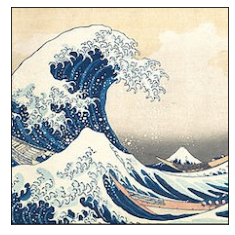

In [7]:
display_image(preprocess_image(style_image_path))

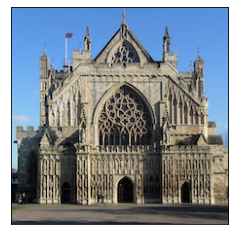

In [8]:
display_image(preprocess_image(content_image_path))

In [9]:
content_layer = 'block4_conv2'

content_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=model.get_layer(content_layer).output
)

In [16]:
style_layers = [
    'block1_conv1', 'block1_conv2',
    'block2_conv1', 'block2_conv2',
    'block3_conv1'
    ]

style_models = [
    tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer).output)
    for layer in style_layers
]

In [17]:
def content_cost(content_img, generated_img):
    C = content_model(content_img)
    G = content_model(generated_img)
    cost = tf.reduce_mean(tf.square(C - G))
    return cost

In [18]:
def gram_matrix(M):
    num_channels = tf.shape(M)[-1]
    M = tf.reshape(M, shape=(-1, num_channels))
    n = tf.shape(M)[0]
    G = tf.matmul(tf.transpose(M), M)
    return G / tf.cast(n, dtype=tf.float32)

In [19]:
def style_cost(style_img, generated_img):
    total_cost = 0
    
    for i, style_model in enumerate(style_models):
        S = style_model(style_img)
        G = style_model(generated_img)
        GS = gram_matrix(S)
        GG = gram_matrix(G)
        current_cost = style_layer_wts[i] * tf.reduce_mean(tf.square(GS - GG))
        total_cost += current_cost
    
    total_cost /= (size * size * len(style_models))
    return total_cost

In [20]:
lr = 7.0
iterations = 20

0


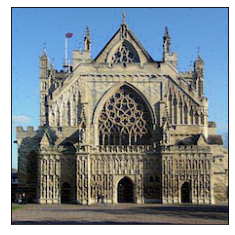

Iteration:1/20, Total Cost:634351488.0, Style Cost: 6343.51513671875, Content Cost: 0.0
1


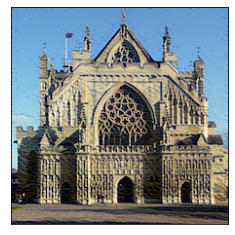

Iteration:2/20, Total Cost:479742912.0, Style Cost: 4796.83984375, Content Cost: 58897.40234375
2


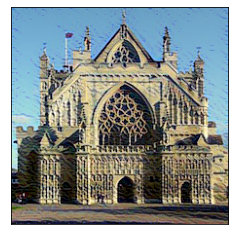

Iteration:3/20, Total Cost:379875360.0, Style Cost: 3797.02197265625, Content Cost: 173156.484375
3


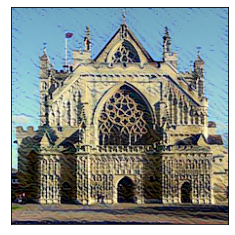

Iteration:4/20, Total Cost:330388064.0, Style Cost: 3300.9716796875, Content Cost: 290918.8125
4


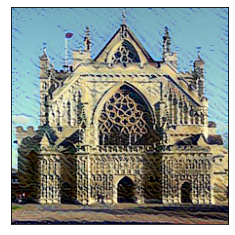

Iteration:5/20, Total Cost:304873408.0, Style Cost: 3045.002197265625, Content Cost: 373198.15625
5


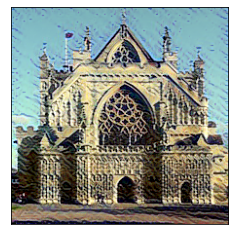

Iteration:6/20, Total Cost:287435264.0, Style Cost: 2870.12939453125, Content Cost: 422334.78125
6


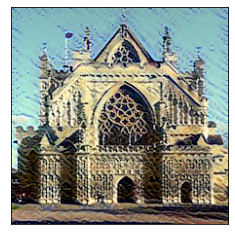

Iteration:7/20, Total Cost:271732288.0, Style Cost: 2712.790283203125, Content Cost: 453262.96875
7


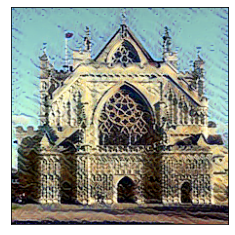

Iteration:8/20, Total Cost:255078768.0, Style Cost: 2546.01220703125, Content Cost: 477557.84375
8


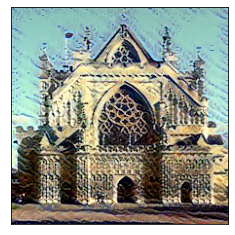

Iteration:9/20, Total Cost:237001984.0, Style Cost: 2365.01953125, Content Cost: 500039.03125
9


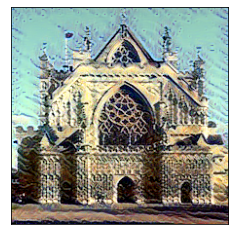

Iteration:10/20, Total Cost:217992144.0, Style Cost: 2174.704345703125, Content Cost: 521706.375
10


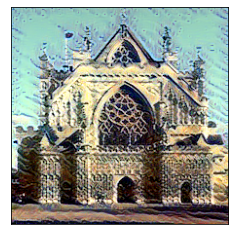

Iteration:11/20, Total Cost:198958112.0, Style Cost: 1984.1541748046875, Content Cost: 542681.375
11


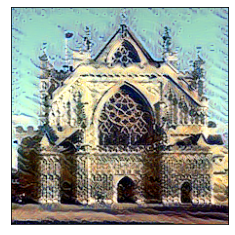

Iteration:12/20, Total Cost:180701936.0, Style Cost: 1801.3885498046875, Content Cost: 563082.3125
12


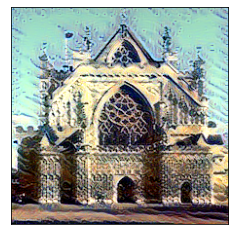

Iteration:13/20, Total Cost:163687952.0, Style Cost: 1631.06591796875, Content Cost: 581367.25
13


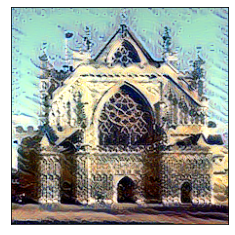

Iteration:14/20, Total Cost:148018224.0, Style Cost: 1474.211181640625, Content Cost: 597111.25
14


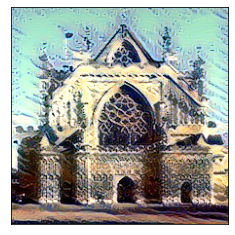

Iteration:15/20, Total Cost:133420304.0, Style Cost: 1328.112548828125, Content Cost: 609048.0
15


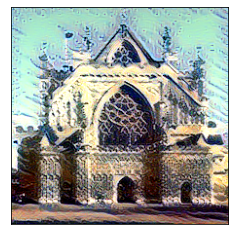

Iteration:16/20, Total Cost:119465776.0, Style Cost: 1188.4932861328125, Content Cost: 616447.6875
16


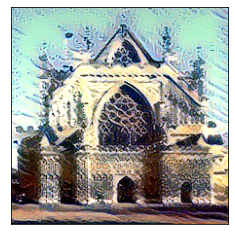

Iteration:17/20, Total Cost:105984216.0, Style Cost: 1053.6378173828125, Content Cost: 620435.8125
17


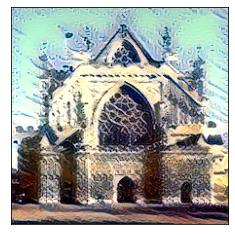

Iteration:18/20, Total Cost:93228760.0, Style Cost: 926.0584106445312, Content Cost: 622923.6875
18


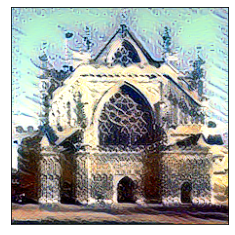

Iteration:19/20, Total Cost:81470560.0, Style Cost: 808.4490356445312, Content Cost: 625657.8125
19


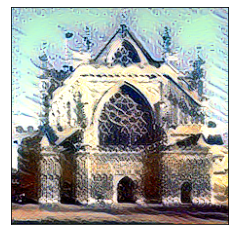

Iteration:20/20, Total Cost:70796864.0, Style Cost: 701.6690673828125, Content Cost: 629956.5
184.85797023773193


In [21]:
content_image_preprocessed = preprocess_image(content_image_path)
style_image_preprocessed = preprocess_image(style_image_path)
generated_image = tf.Variable(content_image_preprocessed, dtype=tf.float32)

generated_images = []
costs = []

optimizer = tf.optimizers.Adam(learning_rate=lr)
import time
now=time.time()
for i in range(iterations):
    print(i)

    with tf.GradientTape() as tape:
        J_content = content_cost(content_img=content_image_preprocessed, generated_img=generated_image)
        J_style = style_cost(style_img=style_image_preprocessed, generated_img=generated_image)
        J_total = content_wt * J_content + style_wt * J_style
    
    gradients = tape.gradient(J_total, generated_image)
    optimizer.apply_gradients([(gradients, generated_image)])
    
    costs.append(J_total.numpy())
    
    if i % 1 == 0:
        display_image(generated_image.numpy())
        generated_images.append(generated_image.numpy())
        print("Iteration:{}/{}, Total Cost:{}, Style Cost: {}, Content Cost: {}".format(i+1, iterations, J_total, J_style, J_content))
print(time.time()-now)

So, initially it is taking 184 seconds for single image

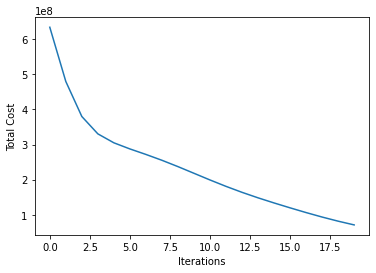

In [22]:
plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.show()

In [23]:
image = Image.fromarray(deprocess(generated_images[-1][0]))

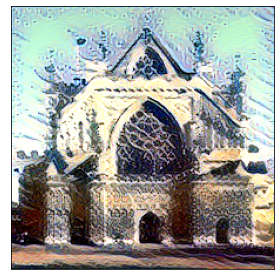

In [24]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('out.png')